## 有时候未来的信息很重要
之前实现的RNN只能看过去，完形填空要看上下文，因此未来的信息很重要
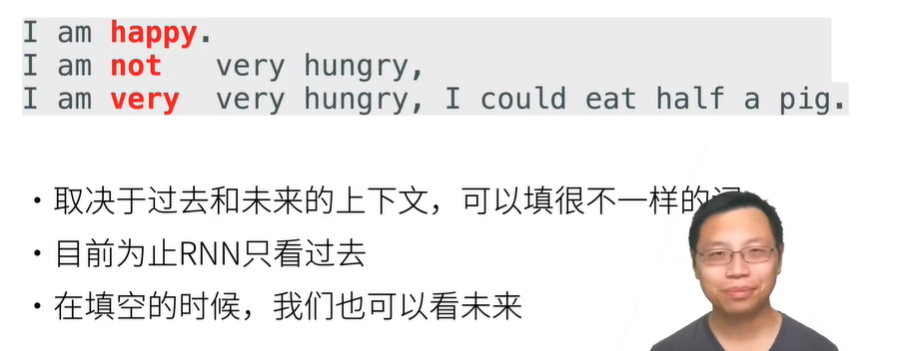

## 双向RNN：隐藏层有两个方向隐状态
Ht是两个方向的隐状态拼接起来
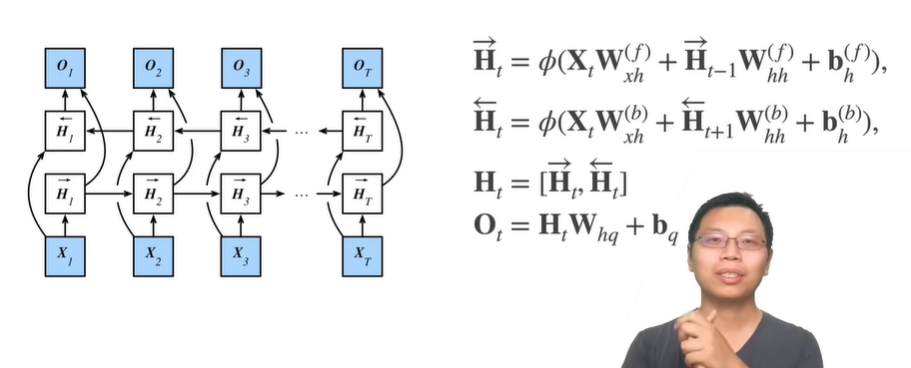
<b>具体实现方式</b>：<br>首先，将序列的每个词元[x1,x2,x3,xt]做一次forward，输出正向隐状态[h1,h2,h3,ht]，（xt是vocab_size维的向量，ht是个num_hiddens维的向量）。<br>然后，对[xt,x3,x2,x1]做一次forward，输出反向隐状态[ht,h3,h2,h1]，再逆置它得到[h1,h2,h3,ht]。将其与正向隐状态用拼接起来，得到每个样本词元的Ht。<br>最后交给输出层计算得到Ot。

## 双向存在的问题
训练可以训练，但<b>不好做推理</b>，因为计算Ot需要用到Ht，而Ht需要用到正向隐状态和反向隐状态，然而我们做推理时是没有反向隐状态信息的
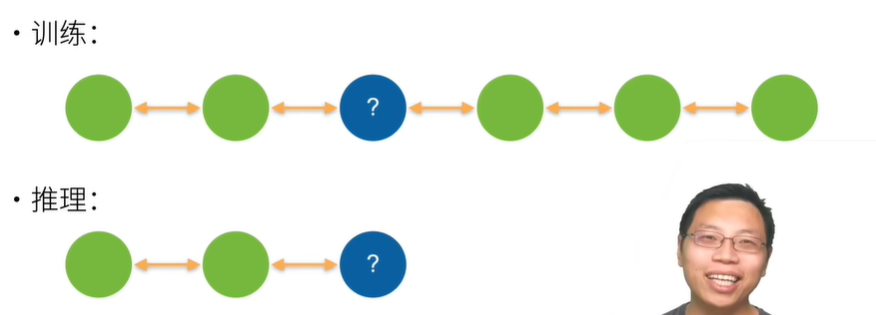

## 总结
常用于对序列抽取特征，比如：做句子翻译
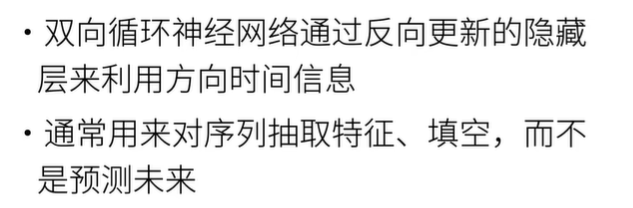

## 双向RNN的错误使用
不能用双向循环神经网络来训练语言模型，因为语言模型是预测未来的，而双向的RNN不适合做这个

困惑度 1.1, 99653.1 词元/秒 cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


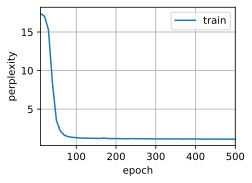

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 加载数据
batch_size, num_steps, device = 32, 35, d2l.try_gpu()
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

# 通过设置“bidirective=True”来定义双向LSTM层
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers, 
                     bidirectional=True)

# 定义模型
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

# 训练模型
num_epochs, lr = 500, 1
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)